# DECISION TREE

### Important Considerations


| PROS |  CONS  |
| ---- | -----  |
| Easy to visualize and Interpret |  Prone to overfitting |
| No normalization of Data Necessary |  Ensemble needed for better performance |
| Handles mixed feature types    |    |


### Iris Example


**Use measurements to predict species**


![](images/iris.png)
Iris Example
Use measurements to predict species

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
#split the data
iris = load_iris()
X = iris.data

y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=667
                                                    )

In [ ]:
len(X_test)

38

In [6]:
#load classifier
model = DecisionTreeClassifier()

In [7]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
#examine score
model.score(X_train, y_train)

1.0

In [9]:
#against test set
model.score(X_test, y_test)

0.9473684210526315

### How would specific flower be classified?

If we have a flower that has:

- Sepal.Length = 1.0
- Sepal.Width = 0.3
- Petal.Length = 1.4
- Petal.Width = 2.1

In [ ]:
model.predict_proba([[1.0, 0.3, 1.4, 2.1]])

array([[0., 1., 0.]])

In [ ]:
res = model.predict([[1.0, 0.3, 1.4, 2.1]])
res[0]

1

In [ ]:
classes={ 0:'setosa',
        1:'virginica',
        2:'versicolor'
}

In [ ]:
y_pred = classes[res[0]]
y_pred

'virginica'

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10)

array([0.83333333, 1.        , 1.        , 0.90909091, 1.        ,
       0.90909091, 0.81818182, 1.        , 1.        , 1.        ])

### How important are different features?

1.   List item
2.   List item

In [ ]:
#list of feature importance
model.feature_importances_

array([0.01786711, 0.        , 0.05050343, 0.93162945])

In [ ]:
importance = model.feature_importances_

<BarContainer object of 4 artists>

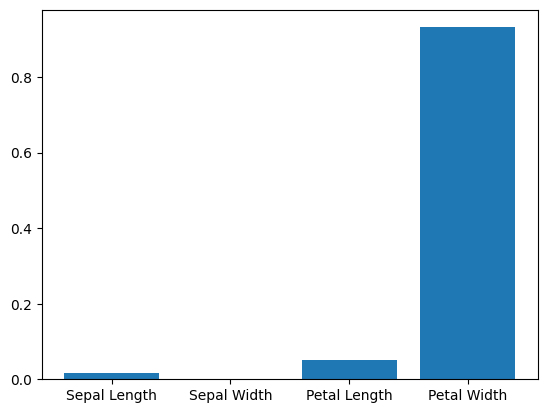

In [ ]:
plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], importance)

### Visualizing Decision Tree

In [ ]:
#https://graphviz.org/download/
## download add to path for windows

In [ ]:
!pip install graphviz -q


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


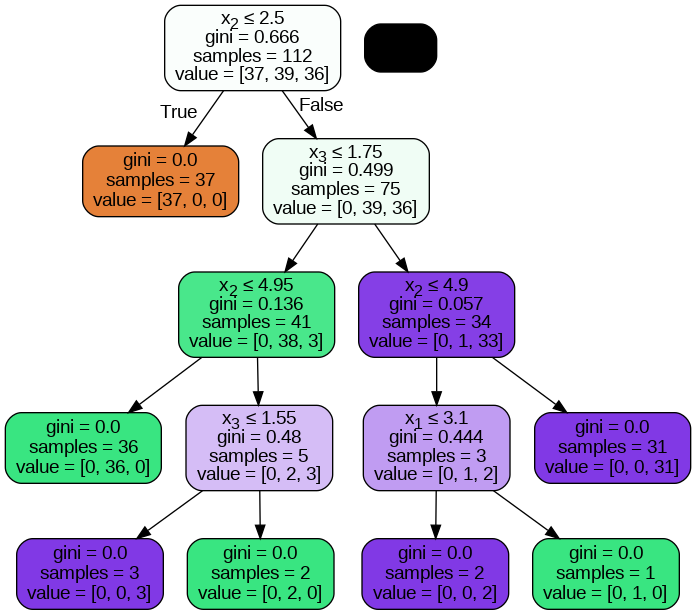

In [10]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### What's Happening with Decision Tree

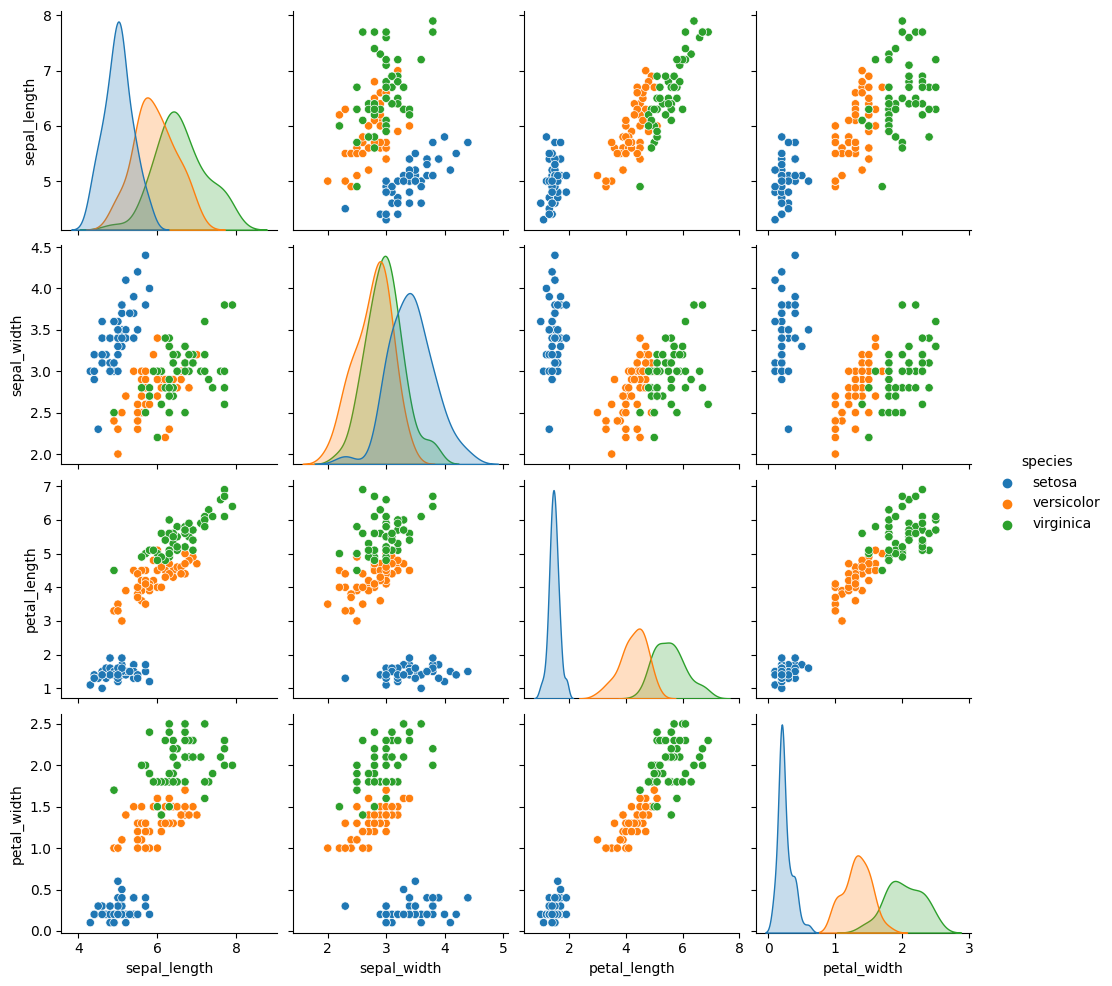

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(data = iris, hue = 'species');

### Pre-pruning: Avoiding Over-fitting

- `max_depth`: limits depth of tree

- `max_leaf_nodes`: limits how many leafs

- `min_samples_leaf`: limits splits to happen when only certain number of samples exist

In [11]:
model = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)

In [12]:
model.score(X_train, y_train)

0.6785714285714286

In [13]:
model.score(X_test, y_test)

0.631578947368421

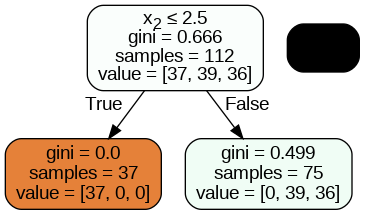

In [14]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [15]:
model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)

In [16]:
model.score(X_train, y_train)

0.9642857142857143

In [17]:
model.score(X_test, y_test)

0.9473684210526315

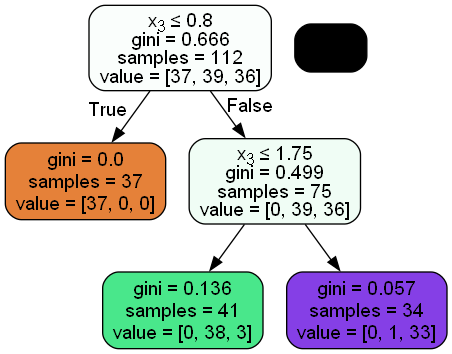

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
model.score(X_train, y_train)

0.9732142857142857

In [19]:
model.score(X_test, y_test)

0.9736842105263158

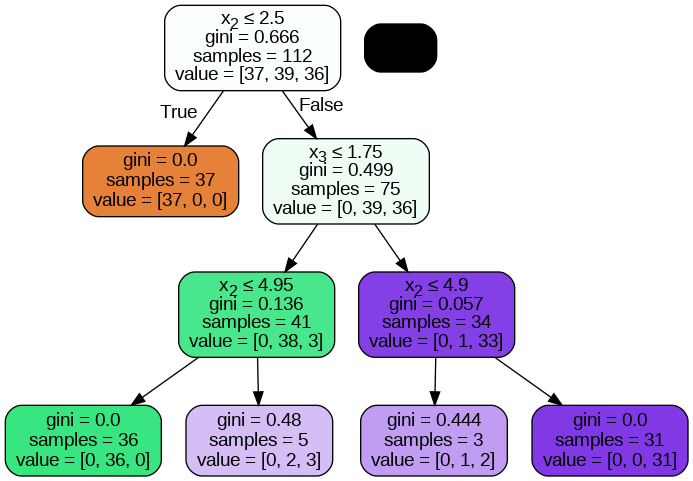

In [20]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Confusion Matrix

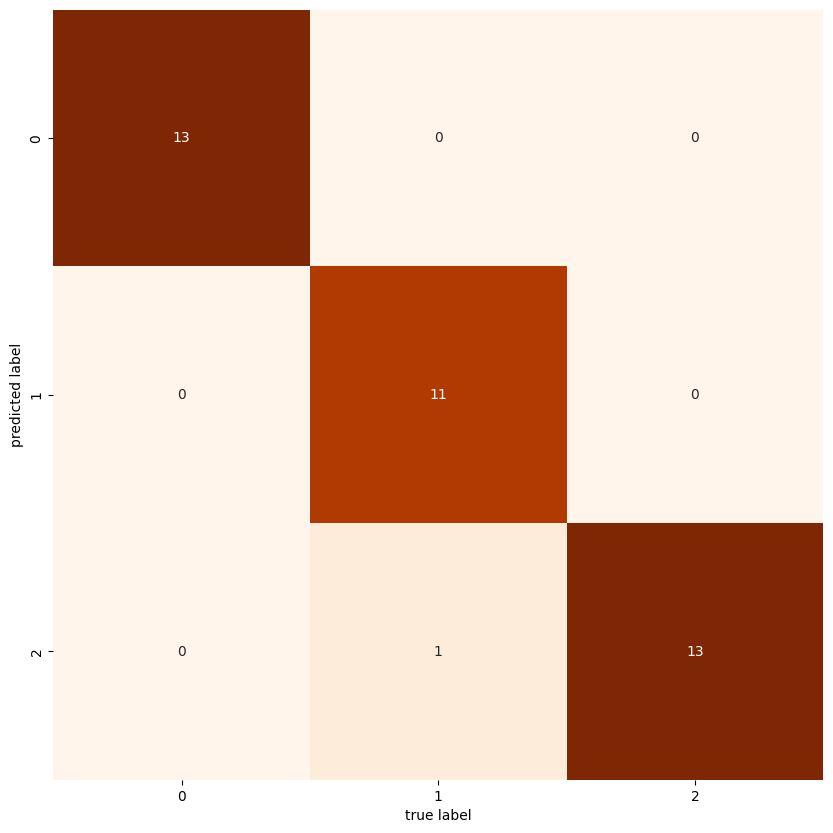

In [21]:
from sklearn.metrics import confusion_matrix

predictions=model.predict(X_test)

mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(18,10))
sns.heatmap(mat, square=True, annot=True, cbar=False,cmap='Oranges')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [22]:
import sklearn
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 13]])

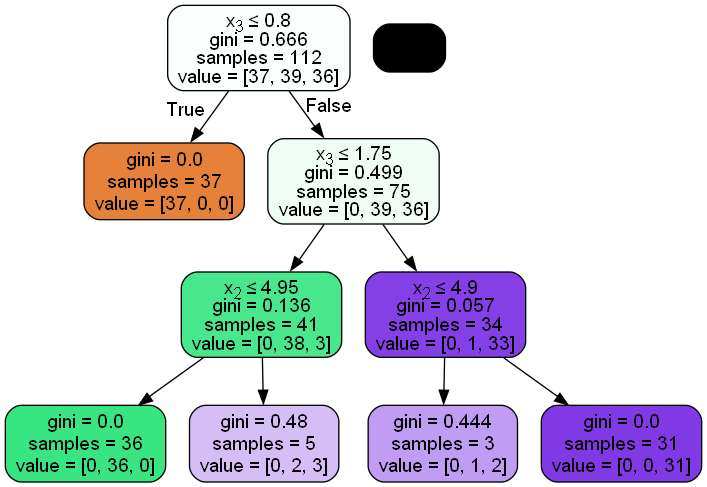

In [ ]:
dot_data2 = StringIO()
export_graphviz(model, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9736842105263158

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

